# 3D plots in Python

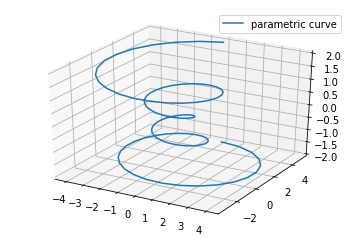

In [3]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')

# Prepare arrays x, y, z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

Parametric curves are easy to plot. Even we can write $ \Latex $ in here. Equations are also easy $ \psi(x) $

On one of these days I'll be all alone living in heaven. 


$$ \bar{x^1} = \gamma (x^1-\beta t)  $$

### Using Plotly to plot datafiles and parametric equations

In [4]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import numpy as np
from scipy import special

py.offline.init_notebook_mode(connected=True)

### Plotting a Mountain from a dataset

In [ ]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode()

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

data = [
    go.Surface(
        z=z_data.as_matrix()
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig, filename='elevations-3d-surface')
py.offline.plot(fig, filename = 'mountain-plot.html',image = 'png')

### Plotting Multiple surfaces in a single Curve

In [ ]:
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode()

z1 = [
    [8.83,8.89,8.81,8.87,8.9,8.87],
    [8.89,8.94,8.85,8.94,8.96,8.92],
    [8.84,8.9,8.82,8.92,8.93,8.91],
    [8.79,8.85,8.79,8.9,8.94,8.92],
    [8.79,8.88,8.81,8.9,8.95,8.92],
    [8.8,8.82,8.78,8.91,8.94,8.92],
    [8.75,8.78,8.77,8.91,8.95,8.92],
    [8.8,8.8,8.77,8.91,8.95,8.94],
    [8.74,8.81,8.76,8.93,8.98,8.99],
    [8.89,8.99,8.92,9.1,9.13,9.11],
    [8.97,8.97,8.91,9.09,9.11,9.11],
    [9.04,9.08,9.05,9.25,9.28,9.27],
    [9,9.01,9,9.2,9.23,9.2],
    [8.99,8.99,8.98,9.18,9.2,9.19],
    [8.93,8.97,8.97,9.18,9.2,9.18]
]

z2 = [[zij+1 for zij in zi] for zi in z1]
z3 = [[zij-1 for zij in zi] for zi in z1]

data = [
    go.Surface(z=z1),
    go.Surface(z=z2, showscale=False, opacity=0.9),
    go.Surface(z=z3, showscale=False, opacity=0.9)

]
layout = go.Layout(
    title='multiple 3d',
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

### Wireframe Plot

In [ ]:
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()


import numpy as np

# Creating the data
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
xGrid, yGrid = np.meshgrid(y, x)
R = np.sqrt(xGrid ** 2 + yGrid ** 2)
z = np.sin(R)

# Creating the plot
lines = []
line_marker = dict(color='#0066FF', width=2)
for i, j, k in zip(xGrid, yGrid, z):
    lines.append(go.Scatter3d(x=i, y=j, z=k, mode='lines', line=line_marker))

layout = go.Layout(
    title='Wireframe Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    ),
    showlegend=False,
)
fig = go.Figure(data=lines, layout=layout)
py.offline.iplot(fig, filename='wireframe_plot')

### Bloch Sphere

In [ ]:
from numpy import *
import plotly as py
from plotly.graph_objs import *

py.offline.init_notebook_mode()

#just a sphere
theta = linspace(0,2*pi,100)
phi = linspace(0,pi,100)
x = outer(cos(theta),sin(phi))
y = outer(sin(theta),sin(phi))
z = outer(ones(100),cos(phi))  # note this is 2d now

data = Data([
    Surface(
        x=x,
        y=y,
        z=z
    )
])
layout = Layout(
    title='Bloch sphere',
    autosize=False,
    width=500,
    height=500,
    margin=Margin(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='bloch-sphere-surface')

### Volcano Plot

In [ ]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly as py
import plotly.graph_objs as go
import pandas as pd
py.offline.init_notebook_mode()

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv')

data = [go.Surface(z=df.values.tolist(), colorscale='Viridis')]

layout = go.Layout(
    width=800,
    height=700,
    autosize=False,
    title='Volcano dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    )
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-surface', height=700, validate=False)

py.offline.iplot(fig, filename='pandas-3d-surface')

### Plotting diffusion data through surface plot

In [ ]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api

import plotly as py
import plotly.graph_objs as go
import pandas as pd
py.offline.init_notebook_mode()

df = pd.read_csv('2D-data.csv')

data = [go.Surface(z=df.values.tolist(), colorscale='Viridis')]

layout = go.Layout(
    width=800,
    height=700,
    autosize=False,
    title='Heat Diffusion 10000th Time Evolved Step',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    )
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-surface', height=700, validate=False)

py.offline.iplot(fig, filename='pandas-3d-surface')